# Exploratory Data Analysis

---

### Essential Libraries

Here we explore our data to understand the data's distribution, visulalise and analyse the relationship between each variable and the target variable, remove any outliers, and select the best variables to predict our target.

We begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization

In [9]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

## Load Cleaned Dataset
Next, we load the cleaned dataset

In [10]:
lung_data = pd.read_csv("lung_clean1.csv")

## Inspection of the dataset
Next, we inspect the dataset to see what are the overview of the data and what are their dtypes.

In [11]:
lung_data.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,2
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,3
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,3
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,3


In [12]:
lung_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

From this, we can see that none of the columns have null/missing values. All variables are dtype int64.

In [13]:
for col in lung_data.columns:
    print(col)
    print(lung_data[col].unique())

Age
[33 17 35 37 46 52 28 44 64 39 34 27 73 36 14 24 53 62 29 65 38 19 42 32
 25 45 26 48 22 18 23 47 61 55 31 49 43 51 54 63]
Gender
[1 2]
Air Pollution
[2 3 4 7 6 5 1 8]
Alcohol use
[4 1 5 7 8 3 6 2]
Dust Allergy
[5 6 7 4 2 8 1 3]
OccuPational Hazards
[4 3 5 7 2 6 8 1]
Genetic Risk
[3 4 5 6 7 2 1]
chronic Lung Disease
[2 4 7 6 3 5 1]
Balanced Diet
[2 6 7 4 5 3 1]
Obesity
[4 2 7 3 5 6 1]
Smoking
[3 2 7 8 1 6 5 4]
Passive Smoker
[2 4 3 7 6 8 5 1]
Chest Pain
[2 4 7 3 6 5 9 8 1]
Coughing of Blood
[4 3 8 9 1 5 7 6 2]
Fatigue
[3 1 8 4 5 9 2 6]
Weight Loss
[4 3 7 2 6 5 1 8]
Shortness of Breath
[2 7 9 3 4 5 6 1]
Wheezing
[2 8 1 4 6 7 5 3]
Swallowing Difficulty
[3 6 1 4 2 5 8 7]
Clubbing of Finger Nails
[1 2 4 5 6 8 7 9 3]
Frequent Cold
[2 1 6 4 3 7 5]
Dry Cough
[3 7 2 4 1 5 6]
Snoring
[4 2 5 3 1 6 7]
Level
[1 2 3]


In the dataset, we have 1 continuous feature which is age, and the rest are categorical in which all are ordinal features.

## Visualisation of the data
Here we visualise our data to see the distrbution of each variable to help us understand the dataset

Number of unique gender : 2
1    598
2    402
Name: Gender, dtype: int64


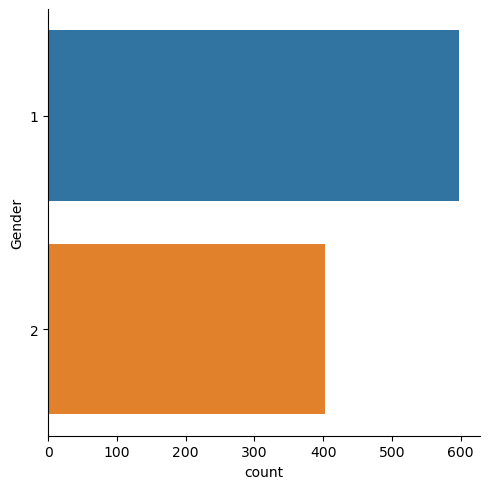

In [14]:
print("Number of unique gender :", len(lung_data["Gender"].unique()))
print(lung_data["Gender"].value_counts())
sb.catplot(y = "Gender", data = lung_data, kind = "count")

Number of Severity Levels : 3
3    365
2    332
1    303
Name: Level, dtype: int64


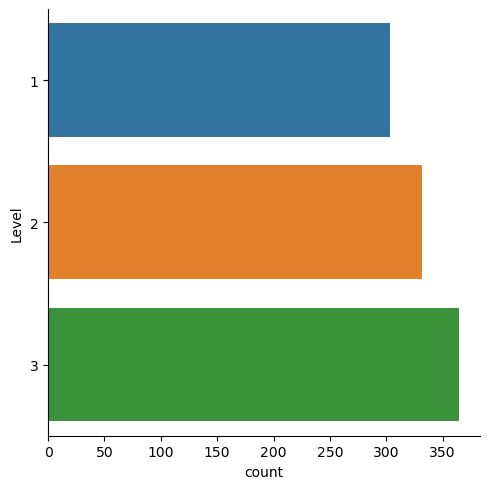

In [15]:
print("Number of Severity Levels :", len(lung_data["Level"].unique()))
print(lung_data["Level"].value_counts())
sb.catplot(y = "Level", data = lung_data, kind = "count")

Severity Levels is as follows: 1 - Low, 2 - Medium, 3 - High

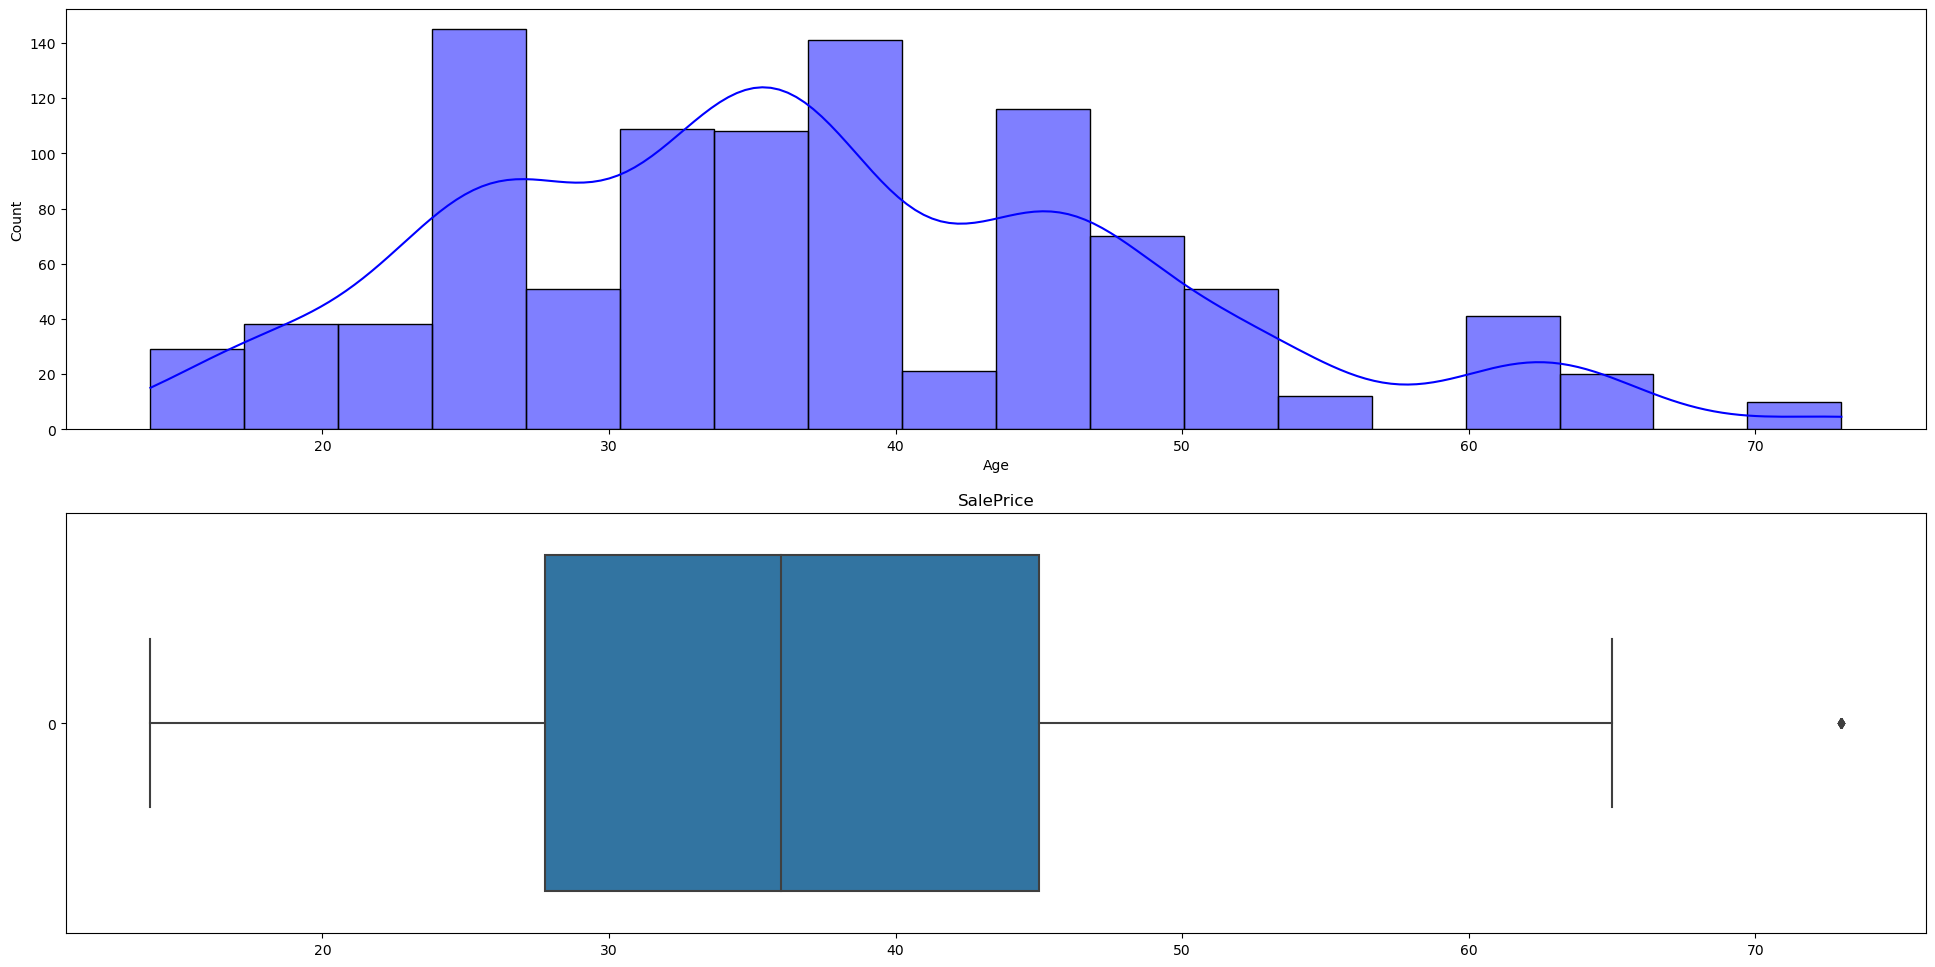

In [16]:
f, axes = plt.subplots(2, 1, figsize=(24, 12))
sb.histplot(lung_data['Age'], bins='auto', kde=True, color='blue', ax = axes[0])
sb.boxplot(data = lung_data['Age'], orient = "h", ax = axes[1]).set(title="SalePrice")
plt.show()

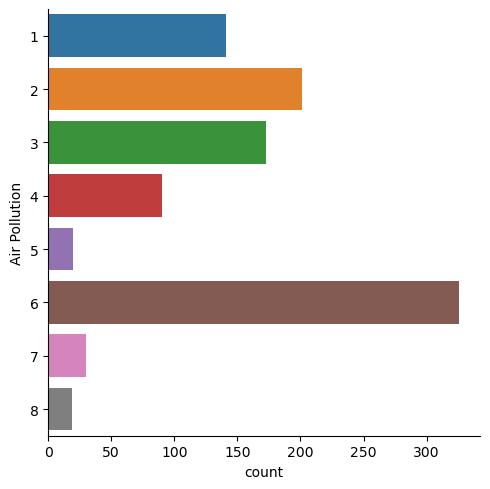

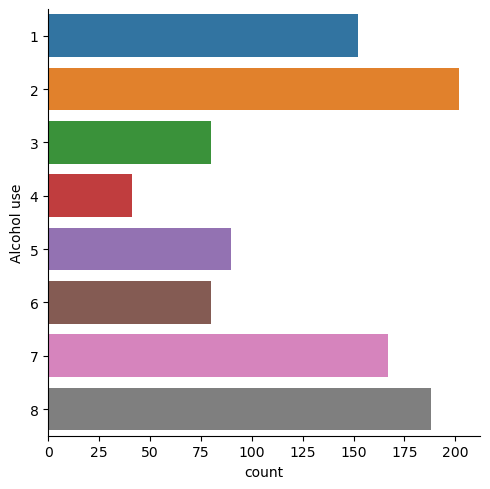

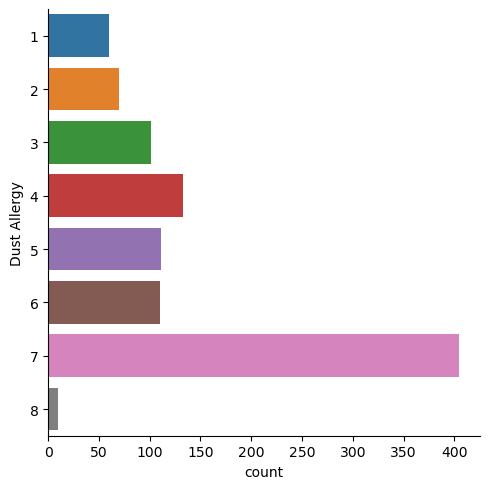

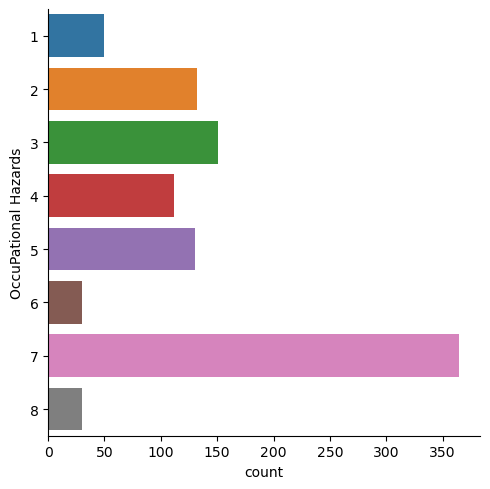

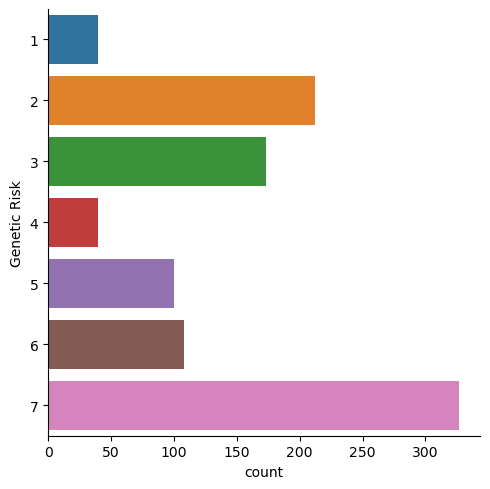

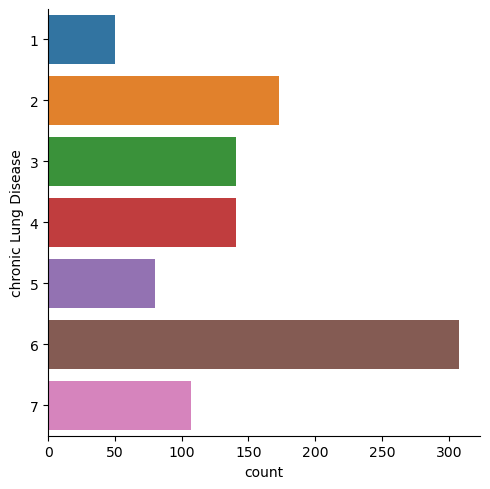

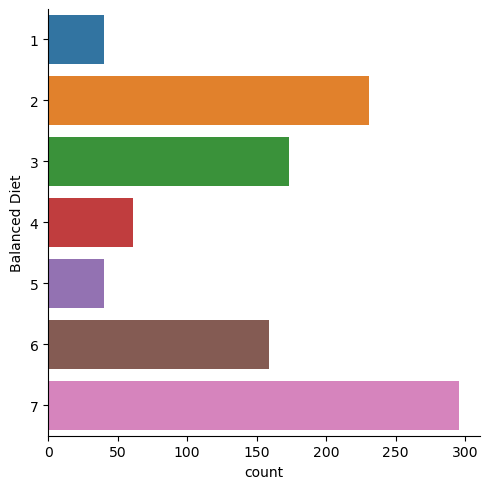

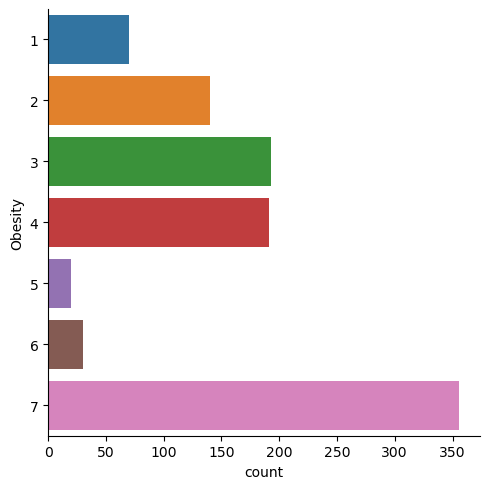

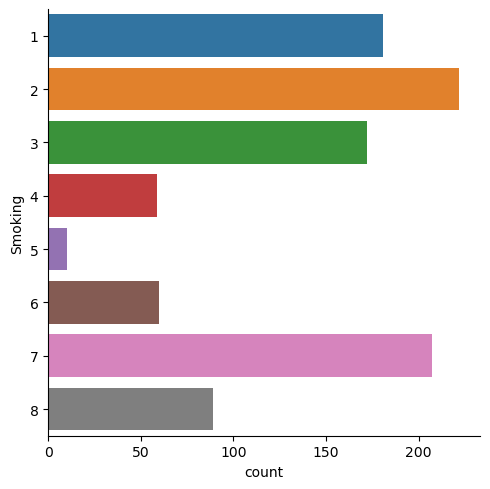

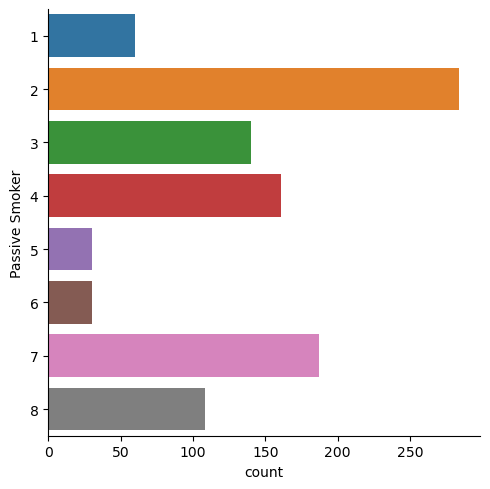

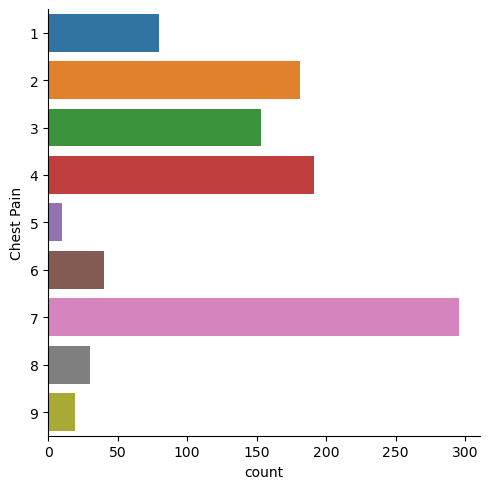

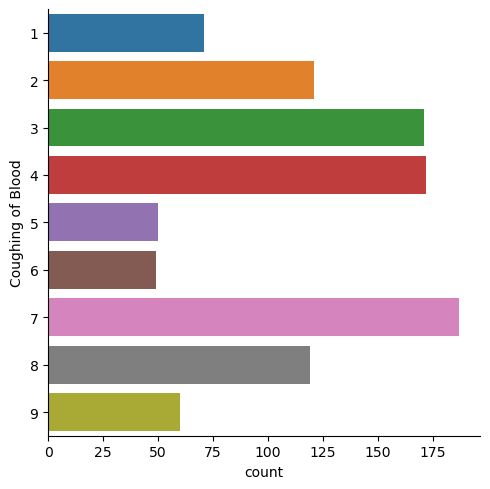

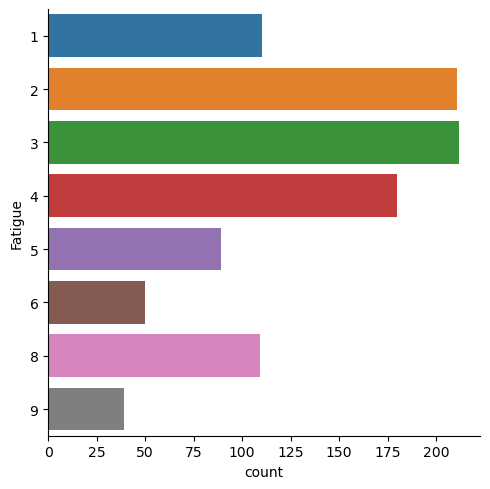

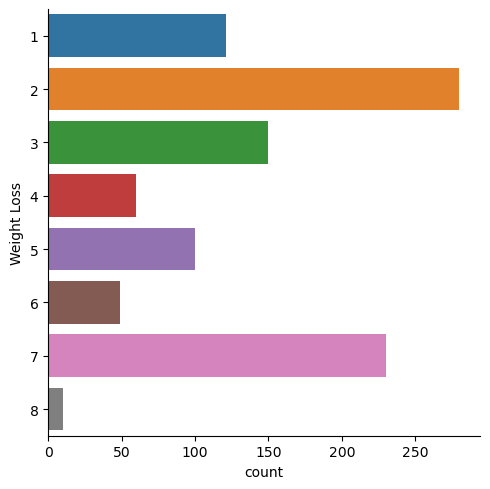

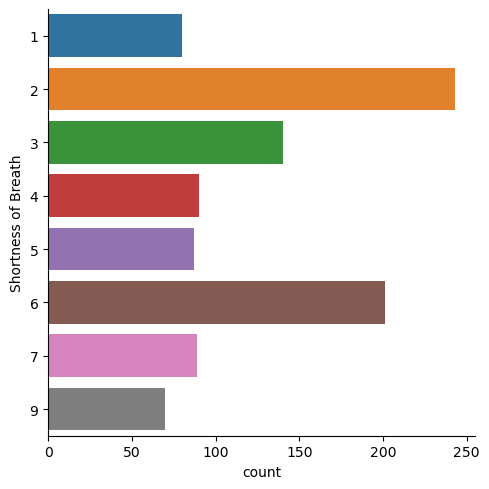

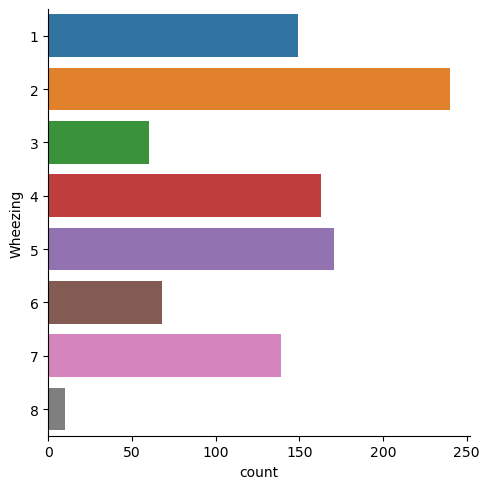

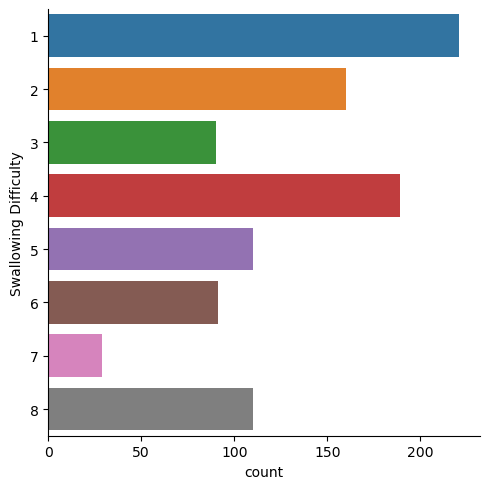

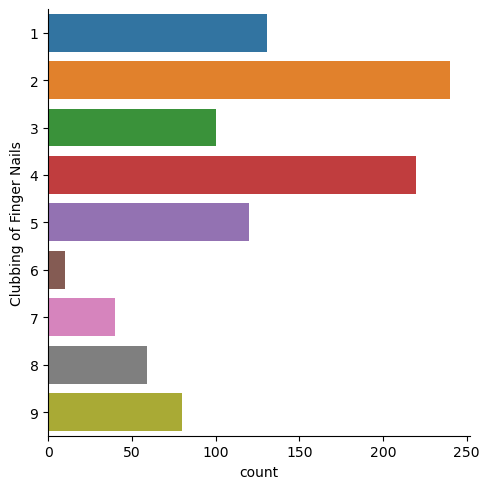

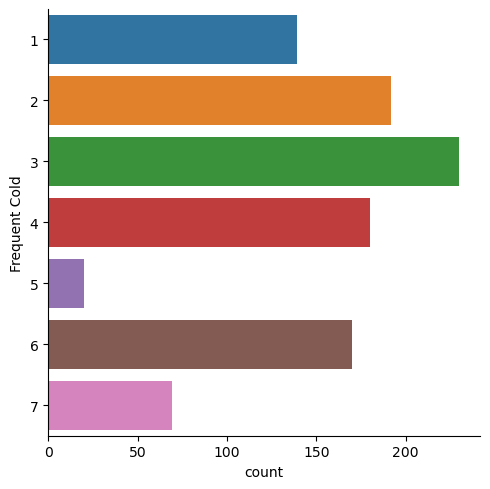

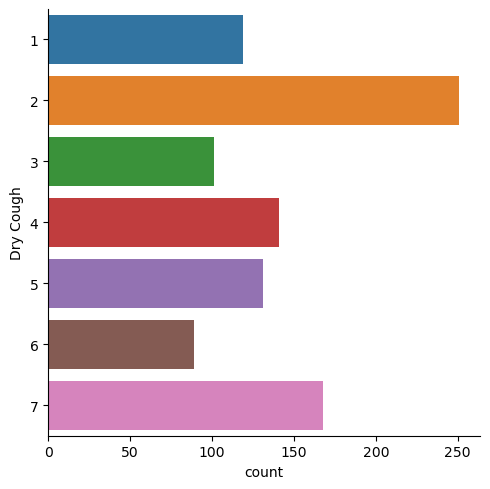

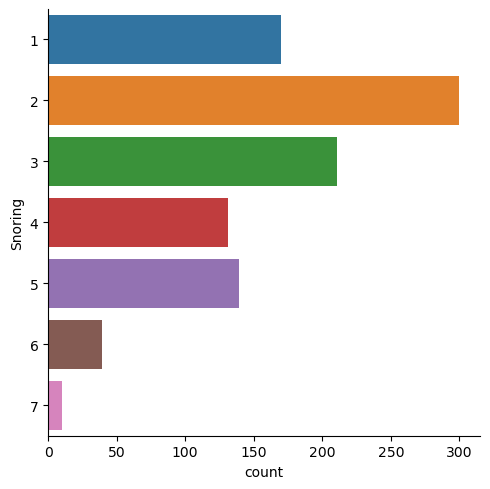

In [17]:
ratings = [col for col in lung_data.columns if col not in ['Gender', 'Age', 'Level']]
for col in ratings:
    sb.catplot(y = col, data = lung_data, kind = "count")
    plt.show()

### Checking for outliers

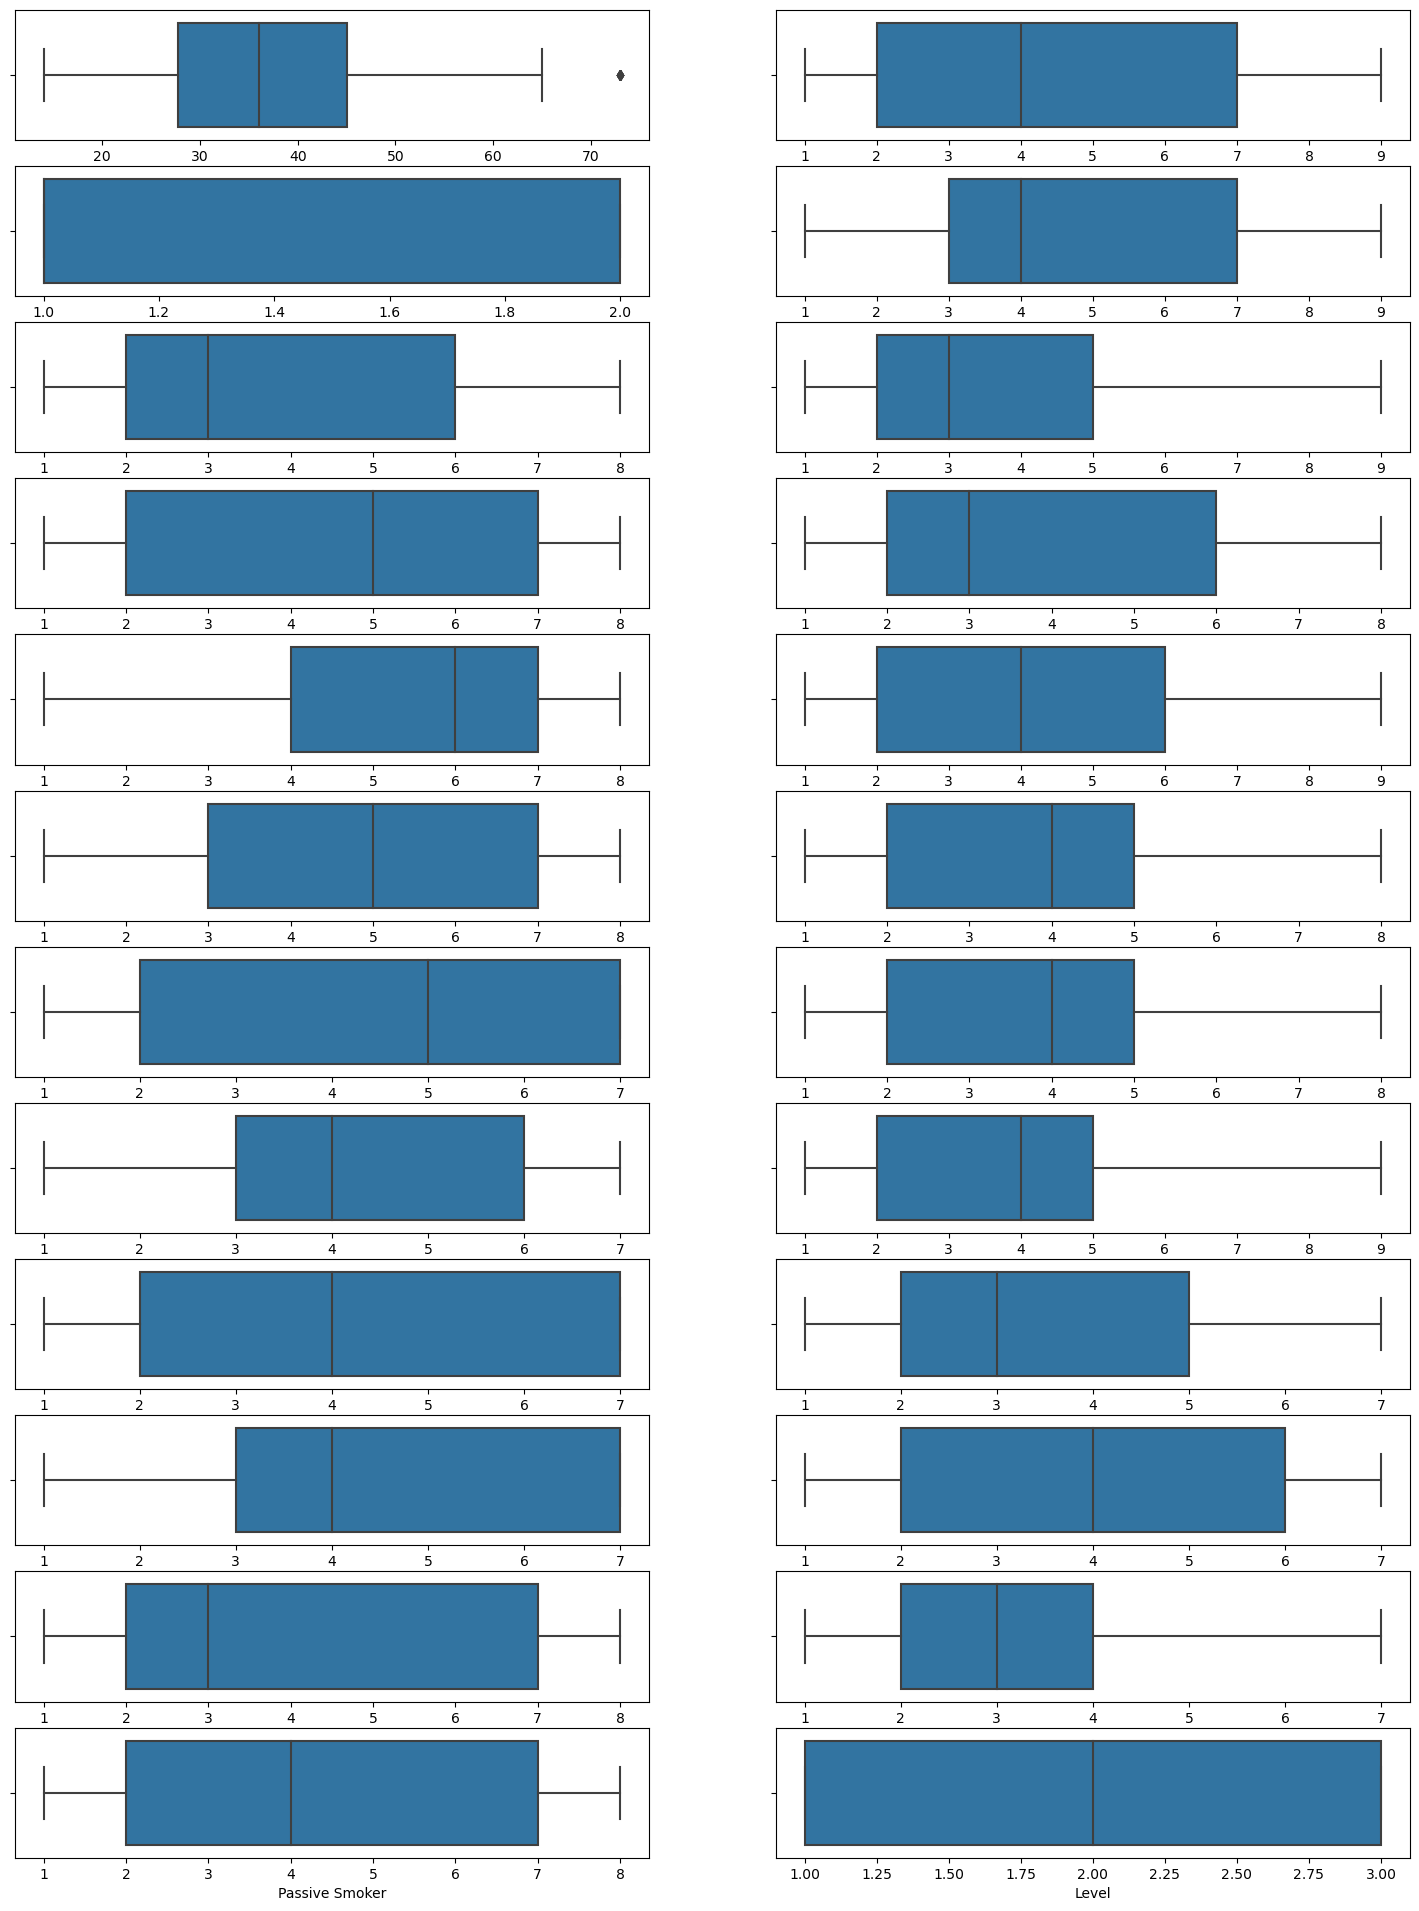

In [18]:
f, axes = plt.subplots(12, 2, figsize=(18, 24))
cols = [col for col in lung_data.columns]
k=0;
for i in range(0,2):
    for j in range(0,12):
        sb.boxplot(data = lung_data, x=cols[k], orient = "h", ax = axes[j,i])
        k+=1
plt.show()

Since all features are categorial, Age as the only continuous feature has outliers.

### Removing outliers

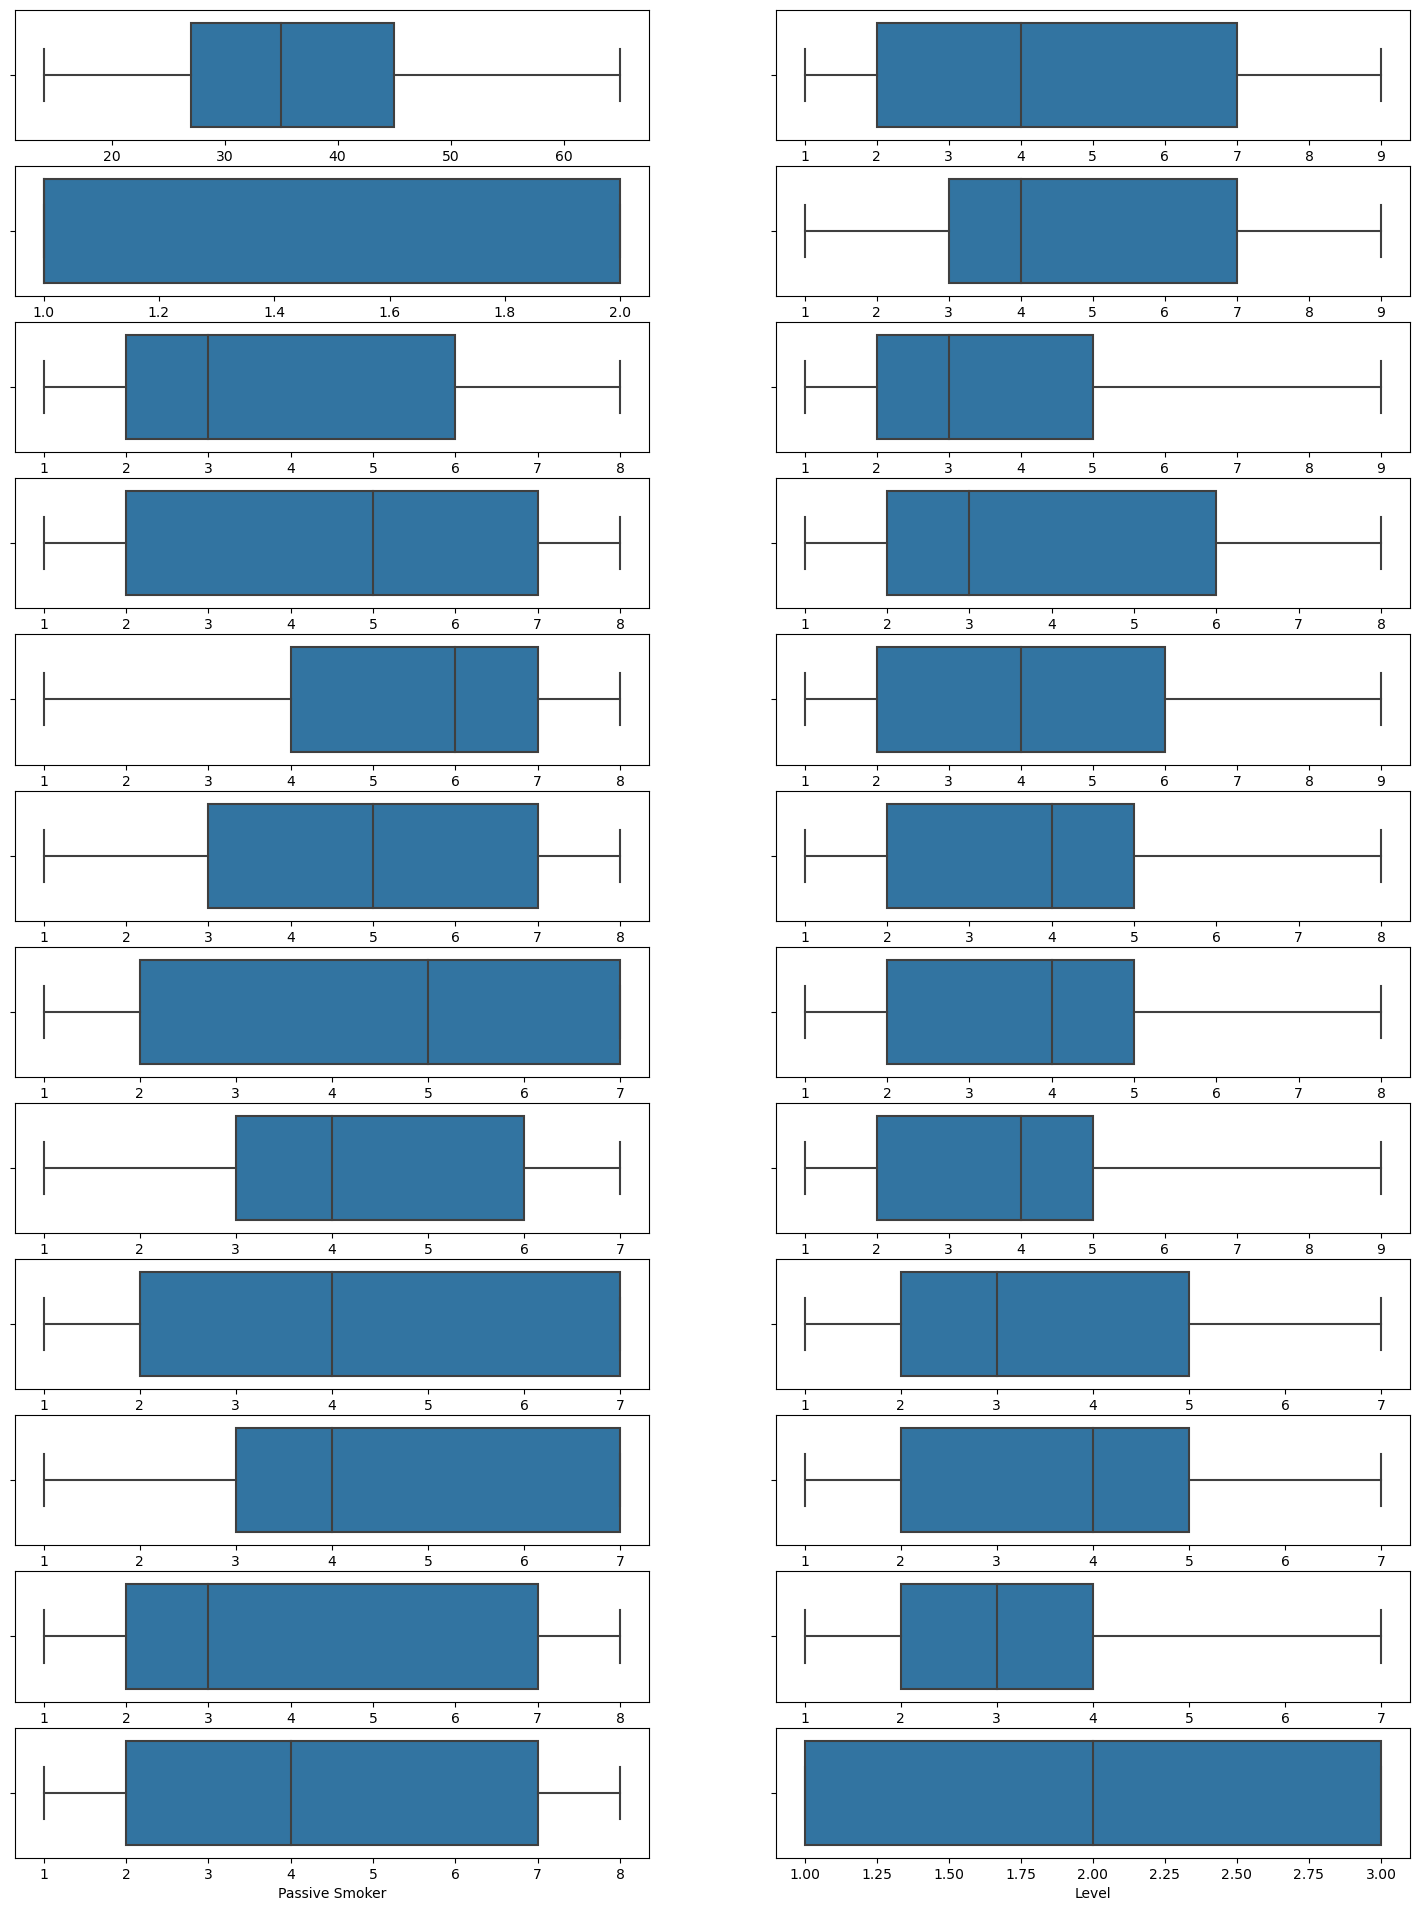

In [19]:
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR # threshold of 1.5
    upper_bound = Q3 + 1.5 * IQR # threshold of 1.5
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

for col in lung_data.columns:
    lung_data = remove_outliers_iqr(lung_data, col)

lung_data.reset_index(drop=True, inplace=True)
    
f, axes = plt.subplots(12, 2, figsize=(18, 24))
cols = [col for col in lung_data.columns]
k=0;
for i in range(0,2):
    for j in range(0,12):
        sb.boxplot(data = lung_data, x=cols[k], orient = "h", ax = axes[j,i])
        k+=1
plt.show()

By using IQR with a thresholed of 1.5, we were able to remove the outlier in Age.

## Finding Best Variables to Predict Severity Level

In [20]:
# Separate variables x and target varible y
x = lung_data.drop("Level", axis=1)
y = lung_data["Level"]

# Separate different types of vairables
ratings = [col for col in lung_data.columns if col not in ['Gender', 'Age', 'Level']]
continuous = ['Age']
categorical = ['Gender']

Here we start by seperating each variables by their types; ordinal, categorical, and continuous. This is so that we can apply different methods to find their relationship between our target variable.

### Using Pearson corrleation to Find Linear Relationship Between Age and Level

In [21]:
corr_coeff = np.abs(x[continuous].corrwith(y))

# Select features with highet abs correlation value
corr_threshold = 0.7 # Defining a threshold
selected_vars = corr_coeff[corr_coeff >= corr_threshold].index.tolist()
corr_coeff

Age    0.065356
dtype: float64

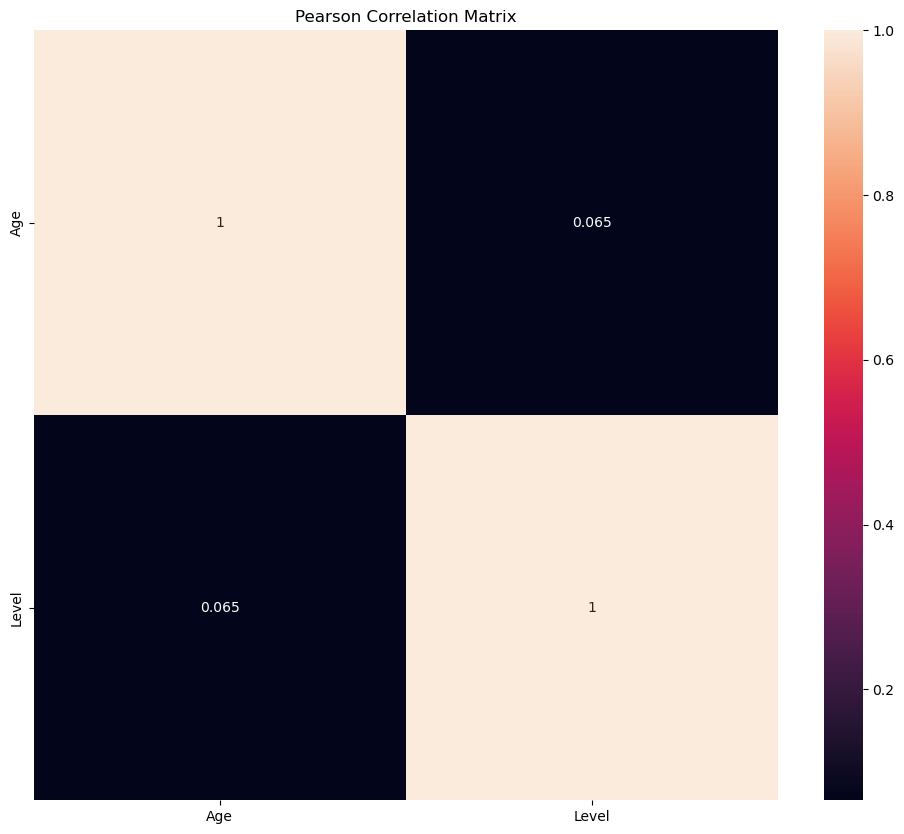

In [22]:
age_level = lung_data[['Age', 'Level']]
corr_matrix = age_level.corr(method='pearson')

# Heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sb.heatmap(corr_matrix, annot=True)
plt.title("Pearson Correlation Matrix")
plt.show()

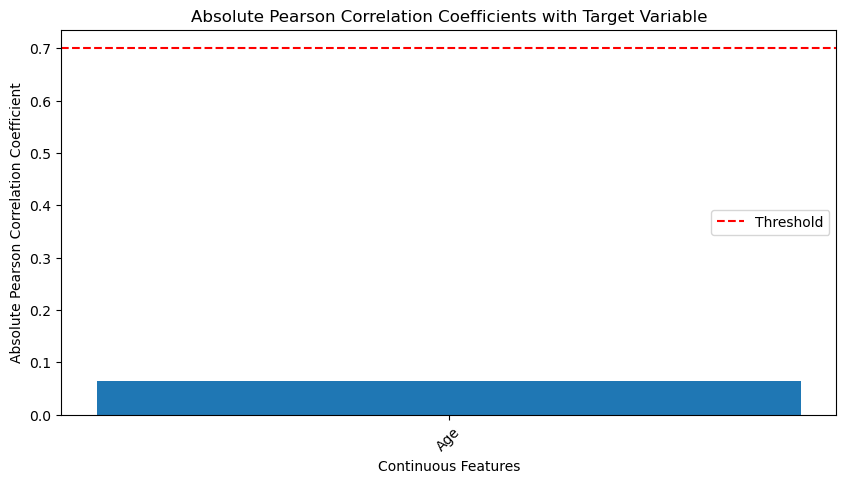

In [23]:
plt.figure(figsize=(10, 5))
plt.bar(continuous, corr_coeff)
plt.axhline(y=corr_threshold, color='r', linestyle='--', label="Threshold")
plt.xlabel("Continuous Features")
plt.ylabel("Absolute Pearson Correlation Coefficient")
plt.title("Absolute Pearson Correlation Coefficients with Target Variable")
plt.legend()
plt.xticks(rotation=45)
plt.show()

Here we can see that Age doeesn't satisfy our correlation threshold of 0.7, therefore we can exclude it as our predictor.

### Chi-square Test to Find Relationship Between Ordinal, Categorical and Severity Level

In [24]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import LabelEncoder

chi2_scores = []
ord_cat = [col for col in lung_data.columns if col not in ['Age', 'Level']]

# Chi-square test to select the top 10 features
k = 10  # Select the top 10 ordinal/categorical features
selector = SelectKBest(score_func=chi2, k=k)
selector.fit(x[ord_cat], y)

selected_vars = [ord_cat[i] for i in range(len(ord_cat)) if selector.get_support()[i]]

print("Top", k, "variables based on chi-square scores:", selected_vars)

Top 10 variables based on chi-square scores: ['Air Pollution', 'Alcohol use', 'Genetic Risk', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue']


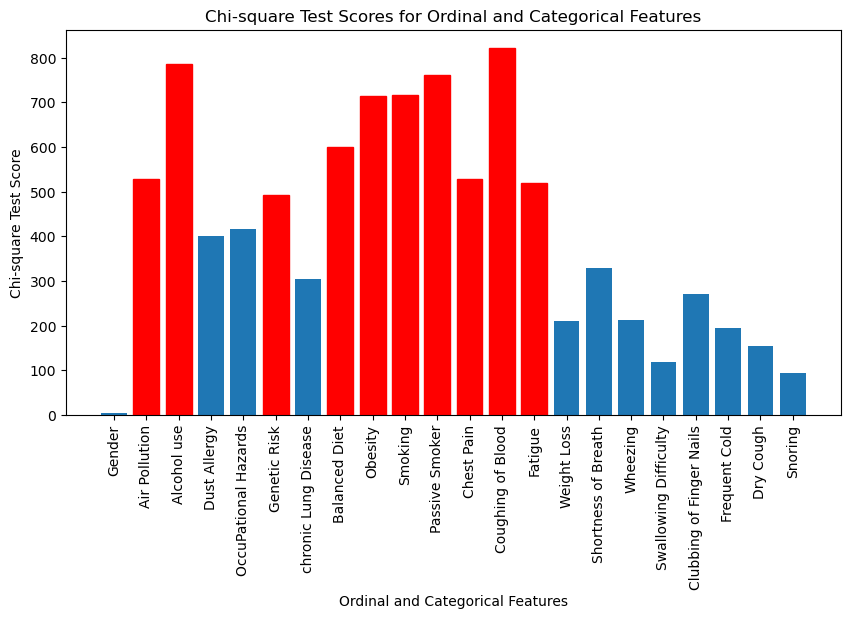

In [25]:
chi2_scores = selector.scores_
selected_mask = selector.get_support()

plt.figure(figsize=(10, 5))
plt.bar(ord_cat, chi2_scores)
plt.xlabel("Ordinal and Categorical Features")
plt.ylabel("Chi-square Test Score")
plt.title("Chi-square Test Scores for Ordinal and Categorical Features")

# Highlight the selected features
for i, is_selected in enumerate(selected_mask):
    if is_selected:
        plt.gca().get_children()[i].set_color('r')

plt.xticks(rotation=90)
plt.show()

Here we used the Chi-Square test to identify the most important categorical variables that have a strong connection with the Severity Level category. The above results are the top 10 strongest connection with the severity level. This excludes gender, and all other ordinal variables.

### Further Narrow Down Best Variables with Logistic Regression Model

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x[selected_vars], y, test_size=0.2, random_state=42)

# Train a logistic regression model with LASSO regularization
logistic_model = LogisticRegression(solver="liblinear")

# Testing for optimal C strength and penalty level
grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(logistic_model, grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_penalty = grid_search.best_params_['penalty']
best_C = grid_search.best_params_['C']
best_score = grid_search.best_score_

print(f"Optimal penalty: {best_penalty}")
print(f"Optimal C value: {best_C}")
print(f"Best cross-validation score: {best_score}")

Optimal penalty: l1
Optimal C value: 100
Best cross-validation score: 0.9292890693416128


In [27]:
logistic_model = LogisticRegression(penalty=best_penalty, solver="liblinear", C=best_C)
logistic_model.fit(X_train, y_train)

final_vars = [selected_vars[i] for i in range(len(selected_vars)) if logistic_model.coef_[0, i] != 0]
final_vars

['Air Pollution',
 'Alcohol use',
 'Genetic Risk',
 'Balanced Diet',
 'Obesity',
 'Smoking',
 'Passive Smoker',
 'Chest Pain',
 'Coughing of Blood',
 'Fatigue']

In [28]:
n_classes = logistic_model.coef_.shape[0]
feature_names = X_train.columns

# Print the coefficients for each class
for i in range(n_classes):
    print(f"Coefficients for class {i + 1}:")
    for feature, coef in zip(feature_names, logistic_model.coef_[i]):
        print(f"{feature}: {coef}")
    print()

Coefficients for class 1:
Air Pollution: 2.182401422859882
Alcohol use: -0.16509086987275445
Genetic Risk: -3.725464606790163
Balanced Diet: 0.0428068984116746
Obesity: -0.7341182680032255
Smoking: 2.7689433104613457
Passive Smoker: -3.137643774008471
Chest Pain: 1.9227013626716523
Coughing of Blood: -2.082694472462416
Fatigue: -3.958501022707351

Coefficients for class 2:
Air Pollution: -1.0057536594166023
Alcohol use: 0.6056628856011216
Genetic Risk: 0.24147378159509875
Balanced Diet: -0.6238321398551593
Obesity: -0.0005896859567113391
Smoking: -0.8153600320535427
Passive Smoker: 0.25113826251642996
Chest Pain: 0.3704452456353732
Coughing of Blood: -0.23966275888688574
Fatigue: 0.24339735590338935

Coefficients for class 3:
Air Pollution: 0.5971270668255663
Alcohol use: 5.900824238489719
Genetic Risk: 1.447691582769567
Balanced Diet: 1.2981738438157164
Obesity: -0.37506154875643233
Smoking: -0.761404937101213
Passive Smoker: 4.638903686310266
Chest Pain: -4.922427046986758
Coughing o

To test and further narrowing down the list of variables we filtered, we used the logistic regression model. To do this, we split the data into 8:2 ratio and feed it into the Logistsic Regression Model. In addition, for most optimal results, we test for the most optimal value for C strength and penalty level of the model. L1 regularization and C strength 100 was chosen and they helped us to select the most important features by shrinking unimportant coefficients to zero, effectively excluding them from the model. This would give us the final best variables that could give us the most accurate prediction. From here, we can see that the lists stays the same, further confirming that we have the best results from the chi-square test.

## Filter Unwanted Columns

In [29]:
final_vars += ['Level']
unwanted_ratings = [col for col in lung_data.columns if col not in final_vars]
filtered_data = lung_data.drop(columns = unwanted_ratings)
filtered_data

,Air Pollution,Alcohol use,Genetic Risk,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Level
0,2,4,3,2,4,3,2,2,4,3,1
1,3,1,4,2,2,2,4,2,3,1,2
2,4,5,5,6,7,2,3,4,8,8,3
3,7,7,6,7,7,7,7,7,8,4,3
4,6,8,7,7,7,8,7,7,9,3,3
...,...,...,...,...,...,...,...,...,...,...,...
985,6,7,7,7,7,7,8,7,7,5,3
986,6,8,7,7,7,7,8,7,7,9,3
987,4,5,5,6,7,2,3,4,8,8,3
988,6,8,7,7,7,8,7,7,9,3,3


## Export Filtered Data

In [30]:
filtered_data.to_csv('lung_clean2.csv', index=False)